# pandas Data

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
# tk qt notebook inline ipympl
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(1, r'./../functions')

In [2]:
path2 = r'./../../../X/Clau/'
name = 'WBDS01walkT06mkr.txt'
fname = os.path.join(path2, name)

## pandas with one index

In [3]:
df = pd.read_csv(fname, sep='\t', header=0, index_col=0, dtype=np.float64, engine='c')
df.columns = df.columns.str.replace('\.', '')
df.head()

,RASISX,RASISY,RASISZ,LASISX,LASISY,LASISZ,RPSISX,RPSISY,RPSISZ,LPSISX,...,LAnkleZ,LHeelX,LHeelY,LHeelZ,LMT1X,LMT1Y,LMT1Z,LMT5X,LMT5Y,LMT5Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000,2419.06,949.288,1349.02,2413.35,961.655,1082.06,2230.66,998.131,1253.99,2227.30,...,1091.20,2281.75,151.246,1147.08,2462.40,64.5344,1127.75,2419.52,66.6852,1062.12
0.007,2417.79,947.784,1349.55,2413.24,960.375,1081.54,2229.80,997.335,1253.15,2226.67,...,1090.61,2299.44,140.837,1146.93,2483.66,62.5606,1126.09,2440.26,63.1807,1060.86
0.013,2416.51,946.174,1350.06,2413.19,959.179,1081.02,2229.02,996.448,1252.32,2226.06,...,1089.89,2317.23,130.618,1146.53,2505.02,60.9174,1124.33,2460.97,60.0245,1058.92
0.020,2415.18,944.435,1350.53,2413.17,957.798,1080.53,2228.22,995.562,1251.44,2225.53,...,1089.18,2335.72,120.529,1145.94,2526.54,59.7517,1122.40,2482.40,57.4057,1057.61
0.027,2414.32,942.717,1351.65,2413.07,956.249,1079.87,2227.37,994.980,1249.85,2225.08,...,1088.23,2354.61,110.970,1145.11,2547.99,58.9703,1120.41,2503.69,55.2194,1055.80


<IPython.core.display.Javascript object>


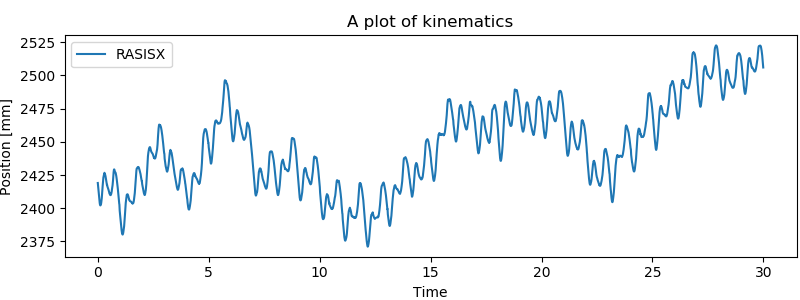

In [4]:
ax = df.plot(y='RASISX', figsize=(8, 3), title='A plot of kinematics')
ax.set_ylabel('Position [mm]')
plt.tight_layout(pad=0, h_pad=0, rect=[0, 0, 1, .95])

In [5]:
def plot_widget(df):
    """general plot widget of a pandas dataframe
    """
    
    from ipywidgets import widgets
    
    col_w = widgets.SelectMultiple(options=df.columns,
                                   value=[df.columns[0]],
                                   description='Column')
    clear_w = widgets.Checkbox(value=True,
                              description='Clear axis')
    container = widgets.HBox(children=[col_w, clear_w])
    display(container)
    
    fig, ax = plt.subplots(1, 1, figsize=(9, 4))
    if col_w.value:
        df.plot(y=col_w.value[0], ax=ax)  
    plt.tight_layout()
    plt.show()
    
    def plot(change):
        if clear_w.value:
            ax.clear()
        for c in col_w.value:
            df.plot(y=c, ax=ax)

    col_w.observe(plot, names='value')

HBox(children=(SelectMultiple(description='Column', index=(0,), options=('RASISX', 'RASISY', 'RASISZ', 'LASISX', 'LASISY', 'LASISZ', 'RPSISX', 'RPSISY', 'RPSISZ', 'LPSISX', 'LPSISY', 'LPSISZ', 'LIliacCrestX', 'LIliacCrestY', 'LIliacCrestZ', 'RIliacCrestX', 'RIliacCrestY', 'RIliacCrestZ', 'RGTRX', 'RGTRY', 'RGTRZ', 'RKneeX', 'RKneeY', 'RKneeZ', 'RHFX', 'RHFY', 'RHFZ', 'RTTX', 'RTTY', 'RTTZ', 'RAnkleX', 'RAnkleY', 'RAnkleZ', 'RHeelX', 'RHeelY', 'RHeelZ', 'RMT1X', 'RMT1Y', 'RMT1Z', 'RMT5X', 'RMT5Y', 'RMT5Z', 'LGTRX', 'LGTRY', 'LGTRZ', 'LKneeX', 'LKneeY', 'LKneeZ', 'LHFX', 'LHFY', 'LHFZ', 'LTTX', 'LTTY', 'LTTZ', 'LAnkleX', 'LAnkleY', 'LAnkleZ', 'LHeelX', 'LHeelY', 'LHeelZ', 'LMT1X', 'LMT1Y', 'LMT1Z', 'LMT5X', 'LMT5Y', 'LMT5Z'), value=('RASISX',)), Checkbox(value=True, description='Clear axis')))

<IPython.core.display.Javascript object>


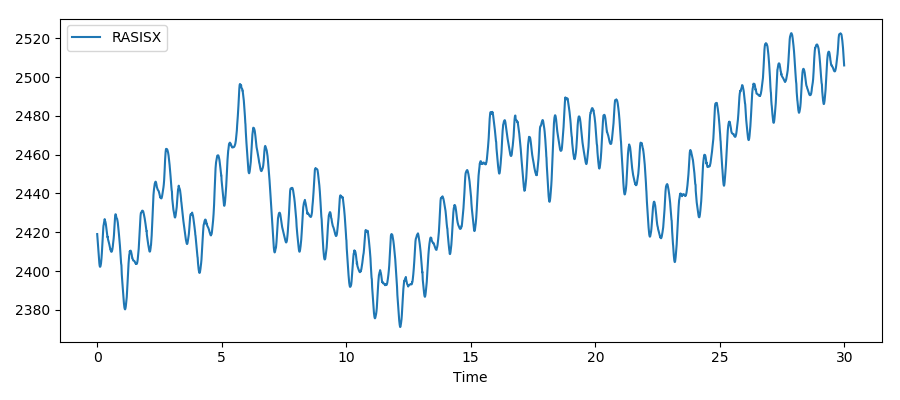

In [6]:
plot_widget(df)

## pandas multiindex

Data with hierarchical column index ([multiindex](http://pandas.pydata.org/pandas-docs/stable/advanced.html#creating-a-multiindex-hierarchical-index-object)) where columns have multiple levels.

In [7]:
df = pd.read_csv(fname, sep='\t', header=0, index_col=0, dtype=np.float64, engine='c')
# format columns as multindexes and relabel them
cols = [s[:-1] for s in df.columns.str.replace('\.', '')]
df.columns = [cols, list('XYZ')*int(df.shape[1]/3)]
df.columns.set_names(names=['Marker', 'Coordinate'], level=[0, 1], inplace=True)
#df = df.swaplevel(0, 1, axis=1)  # for 'Coordinate' to go first

In [8]:
df.head()

Marker        RASIS                      LASIS                      RPSIS  \
Coordinate        X        Y        Z        X        Y        Z        X   
Time                                                                        
0.000       2419.06  949.288  1349.02  2413.35  961.655  1082.06  2230.66   
0.007       2417.79  947.784  1349.55  2413.24  960.375  1081.54  2229.80   
0.013       2416.51  946.174  1350.06  2413.19  959.179  1081.02  2229.02   
0.020       2415.18  944.435  1350.53  2413.17  957.798  1080.53  2228.22   
0.027       2414.32  942.717  1351.65  2413.07  956.249  1079.87  2227.37   

Marker                          LPSIS   ...      LAnkle    LHeel           \
Coordinate        Y        Z        X   ...           Z        X        Y   
Time                                    ...                                 
0.000       998.131  1253.99  2227.30   ...     1091.20  2281.75  151.246   
0.007       997.335  1253.15  2226.67   ...     1090.61  2299.44  140.837   
0.013       996.448  1252.32  2226.06   ...     1089.89  2317.23  130.618   
0.020       995.562  1251.44  2225.53   ...     1089.18  2335.72  120.529   
0.027       994.980  1249.85  2225.08   ...     1088.23  2354.61  110.970   

Marker                  LMT1                       LMT5                    
Coordinate        Z        X        Y        Z        X        Y        Z  
Time                                                                       
0.000       1147.08  2462.40  64.5344  1127.75  2419.52  66.6852  1062.12  
0.007       1146.93  2483.66  62.5606  1126.09  2440.26  63.1807  1060.86  
0.013       1146.53  2505.02  60.9174  1124.33  2460.97  60.0245  1058.92  
0.020       1145.94  2526.54  59.7517  1122.40  2482.40  57.4057  1057.61  
0.027       1145.11  2547.99  58.9703  1120.41  2503.69  55.2194  1055.80  

[5 rows x 66 columns]

In [9]:
df['RASIS'].head()
# df.RASIS.head()

Coordinate,X,Y,Z
Time,,,
0.000,2419.06,949.288,1349.02
0.007,2417.79,947.784,1349.55
0.013,2416.51,946.174,1350.06
0.020,2415.18,944.435,1350.53
0.027,2414.32,942.717,1351.65


In [10]:
df.RASIS.X.head()
# df['RASIS']['X'].head()

Time
0.000    2419.06
0.007    2417.79
0.013    2416.51
0.020    2415.18
0.027    2414.32
Name: X, dtype: float64

In [12]:
df.xs('X', level='Coordinate', axis=1).head()

Marker,RASIS,LASIS,RPSIS,LPSIS,LIliacCrest,RIliacCrest,RGTR,RKnee,RHF,RTT,...,RMT1,RMT5,LGTR,LKnee,LHF,LTT,LAnkle,LHeel,LMT1,LMT5
Time,,,,,,,,,,,,,,,,,,,,,
0.000,2419.06,2413.35,2230.66,2227.30,2330.16,2352.05,2308.83,2289.09,2266.17,2323.79,...,2363.95,2319.02,2342.70,2507.21,2482.49,2544.88,2334.25,2281.75,2462.40,2419.52
0.007,2417.79,2413.24,2229.80,2226.67,2329.08,2350.01,2306.84,2282.28,2259.05,2317.03,...,2354.67,2309.53,2343.63,2509.94,2485.80,2549.45,2351.29,2299.44,2483.66,2440.26
0.013,2416.51,2413.19,2229.02,2226.06,2327.98,2347.96,2304.89,2275.64,2251.49,2309.97,...,2345.34,2300.09,2343.94,2512.04,2489.29,2553.49,2368.83,2317.23,2505.02,2460.97
0.020,2415.18,2413.17,2228.22,2225.53,2327.19,2345.79,2303.02,2269.24,2244.68,2302.86,...,2335.90,2290.63,2344.08,2513.75,2492.54,2557.22,2386.56,2335.72,2526.54,2482.40
0.027,2414.32,2413.07,2227.37,2225.08,2327.50,2343.83,2301.13,2263.20,2237.90,2295.31,...,2326.70,2281.25,2344.29,2514.84,2495.31,2560.20,2404.93,2354.61,2547.99,2503.69


In [13]:
df.loc[:, (slice(None), 'X')].head()

Marker,RASIS,LASIS,RPSIS,LPSIS,LIliacCrest,RIliacCrest,RGTR,RKnee,RHF,RTT,...,RMT1,RMT5,LGTR,LKnee,LHF,LTT,LAnkle,LHeel,LMT1,LMT5
Coordinate,X,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X
Time,,,,,,,,,,,,,,,,,,,,,
0.000,2419.06,2413.35,2230.66,2227.30,2330.16,2352.05,2308.83,2289.09,2266.17,2323.79,...,2363.95,2319.02,2342.70,2507.21,2482.49,2544.88,2334.25,2281.75,2462.40,2419.52
0.007,2417.79,2413.24,2229.80,2226.67,2329.08,2350.01,2306.84,2282.28,2259.05,2317.03,...,2354.67,2309.53,2343.63,2509.94,2485.80,2549.45,2351.29,2299.44,2483.66,2440.26
0.013,2416.51,2413.19,2229.02,2226.06,2327.98,2347.96,2304.89,2275.64,2251.49,2309.97,...,2345.34,2300.09,2343.94,2512.04,2489.29,2553.49,2368.83,2317.23,2505.02,2460.97
0.020,2415.18,2413.17,2228.22,2225.53,2327.19,2345.79,2303.02,2269.24,2244.68,2302.86,...,2335.90,2290.63,2344.08,2513.75,2492.54,2557.22,2386.56,2335.72,2526.54,2482.40
0.027,2414.32,2413.07,2227.37,2225.08,2327.50,2343.83,2301.13,2263.20,2237.90,2295.31,...,2326.70,2281.25,2344.29,2514.84,2495.31,2560.20,2404.93,2354.61,2547.99,2503.69


In [14]:
df.swaplevel(0, 1, axis=1).head()  # for 'Coordinate' to go first

Coordinate,X,Y,Z,X,Y,Z,X,Y,Z,X,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
Marker,RASIS,RASIS,RASIS,LASIS,LASIS,LASIS,RPSIS,RPSIS,RPSIS,LPSIS,...,LAnkle,LHeel,LHeel,LHeel,LMT1,LMT1,LMT1,LMT5,LMT5,LMT5
Time,,,,,,,,,,,,,,,,,,,,,
0.000,2419.06,949.288,1349.02,2413.35,961.655,1082.06,2230.66,998.131,1253.99,2227.30,...,1091.20,2281.75,151.246,1147.08,2462.40,64.5344,1127.75,2419.52,66.6852,1062.12
0.007,2417.79,947.784,1349.55,2413.24,960.375,1081.54,2229.80,997.335,1253.15,2226.67,...,1090.61,2299.44,140.837,1146.93,2483.66,62.5606,1126.09,2440.26,63.1807,1060.86
0.013,2416.51,946.174,1350.06,2413.19,959.179,1081.02,2229.02,996.448,1252.32,2226.06,...,1089.89,2317.23,130.618,1146.53,2505.02,60.9174,1124.33,2460.97,60.0245,1058.92
0.020,2415.18,944.435,1350.53,2413.17,957.798,1080.53,2228.22,995.562,1251.44,2225.53,...,1089.18,2335.72,120.529,1145.94,2526.54,59.7517,1122.40,2482.40,57.4057,1057.61
0.027,2414.32,942.717,1351.65,2413.07,956.249,1079.87,2227.37,994.980,1249.85,2225.08,...,1088.23,2354.61,110.970,1145.11,2547.99,58.9703,1120.41,2503.69,55.2194,1055.80


<IPython.core.display.Javascript object>


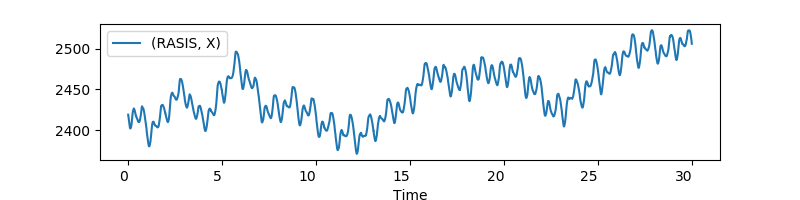

In [11]:
ax = df.plot(y=('RASIS', 'X'), subplots=True, figsize=(8, 2), rot=0)

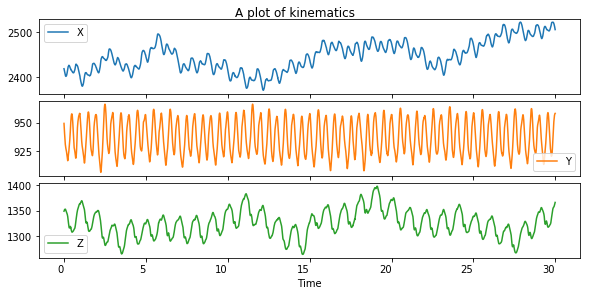

In [12]:
ax = df.plot(y='RASIS', subplots=True, sharex=True, figsize=(8, 4), rot=0,
             title='A plot of kinematics')
plt.tight_layout(pad=0, h_pad=0, rect=[0, 0, 1, .95])

In [13]:
values = df.reset_index(drop=False).values
values[0, :5]

array([    0.   ,  2419.06 ,   949.288,  1349.02 ,  2413.35 ])

In [14]:
df.head()

Marker        RASIS                      LASIS                      RPSIS  \
Coordinate        X        Y        Z        X        Y        Z        X   
Time                                                                        
0.000       2419.06  949.288  1349.02  2413.35  961.655  1082.06  2230.66   
0.007       2417.79  947.784  1349.55  2413.24  960.375  1081.54  2229.80   
0.013       2416.51  946.174  1350.06  2413.19  959.179  1081.02  2229.02   
0.020       2415.18  944.435  1350.53  2413.17  957.798  1080.53  2228.22   
0.027       2414.32  942.717  1351.65  2413.07  956.249  1079.87  2227.37   

Marker                          LPSIS   ...      LAnkle    LHeel           \
Coordinate        Y        Z        X   ...           Z        X        Y   
Time                                    ...                                 
0.000       998.131  1253.99  2227.30   ...     1091.20  2281.75  151.246   
0.007       997.335  1253.15  2226.67   ...     1090.61  2299.44  140.837   
0.013       996.448  1252.32  2226.06   ...     1089.89  2317.23  130.618   
0.020       995.562  1251.44  2225.53   ...     1089.18  2335.72  120.529   
0.027       994.980  1249.85  2225.08   ...     1088.23  2354.61  110.970   

Marker                  LMT1                       LMT5                    
Coordinate        Z        X        Y        Z        X        Y        Z  
Time                                                                       
0.000       1147.08  2462.40  64.5344  1127.75  2419.52  66.6852  1062.12  
0.007       1146.93  2483.66  62.5606  1126.09  2440.26  63.1807  1060.86  
0.013       1146.53  2505.02  60.9174  1124.33  2460.97  60.0245  1058.92  
0.020       1145.94  2526.54  59.7517  1122.40  2482.40  57.4057  1057.61  
0.027       1145.11  2547.99  58.9703  1120.41  2503.69  55.2194  1055.80  

[5 rows x 66 columns]

In [15]:
x = df.swaplevel(0, 1, axis=1)

In [16]:
x2 = x.unstack(level=-1)
x2.head()

Coordinate  Marker  Time 
X           RASIS   0.000    2419.06
                    0.007    2417.79
                    0.013    2416.51
                    0.020    2415.18
                    0.027    2414.32
dtype: float64

In [17]:
x.head()

Coordinate,X,Y,Z,X,Y,Z,X,Y,Z,X,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
Marker,RASIS,RASIS,RASIS,LASIS,LASIS,LASIS,RPSIS,RPSIS,RPSIS,LPSIS,...,LAnkle,LHeel,LHeel,LHeel,LMT1,LMT1,LMT1,LMT5,LMT5,LMT5
Time,,,,,,,,,,,,,,,,,,,,,
0.000,2419.06,949.288,1349.02,2413.35,961.655,1082.06,2230.66,998.131,1253.99,2227.30,...,1091.20,2281.75,151.246,1147.08,2462.40,64.5344,1127.75,2419.52,66.6852,1062.12
0.007,2417.79,947.784,1349.55,2413.24,960.375,1081.54,2229.80,997.335,1253.15,2226.67,...,1090.61,2299.44,140.837,1146.93,2483.66,62.5606,1126.09,2440.26,63.1807,1060.86
0.013,2416.51,946.174,1350.06,2413.19,959.179,1081.02,2229.02,996.448,1252.32,2226.06,...,1089.89,2317.23,130.618,1146.53,2505.02,60.9174,1124.33,2460.97,60.0245,1058.92
0.020,2415.18,944.435,1350.53,2413.17,957.798,1080.53,2228.22,995.562,1251.44,2225.53,...,1089.18,2335.72,120.529,1145.94,2526.54,59.7517,1122.40,2482.40,57.4057,1057.61
0.027,2414.32,942.717,1351.65,2413.07,956.249,1079.87,2227.37,994.980,1249.85,2225.08,...,1088.23,2354.61,110.970,1145.11,2547.99,58.9703,1120.41,2503.69,55.2194,1055.80
